In [5]:
import numpy as np
import os
from datetime import datetime, timedelta
from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid, dataset, data_wizard
import matplotlib.pyplot as plt

grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()
lat_file = '/Users/joaojesus/Desktop/final_year_proj/coordinates_40km_grid/Airs_nh_lat_40_grid.csv'
lon_file = '/Users/joaojesus/Desktop/final_year_proj/coordinates_40km_grid/Airs_nh_lon_40_grid.csv'

def get_day_array(date_string = "2018-02-11", days = 9):
    date = datetime.strptime(date_string, "%Y-%m-%d")
    dates = []
    for i in range(days):
        previous_date = date - timedelta(days=i+1)
        dates.append(previous_date.strftime("%Y-%m-%d")) 
    dates.reverse()
    return dates

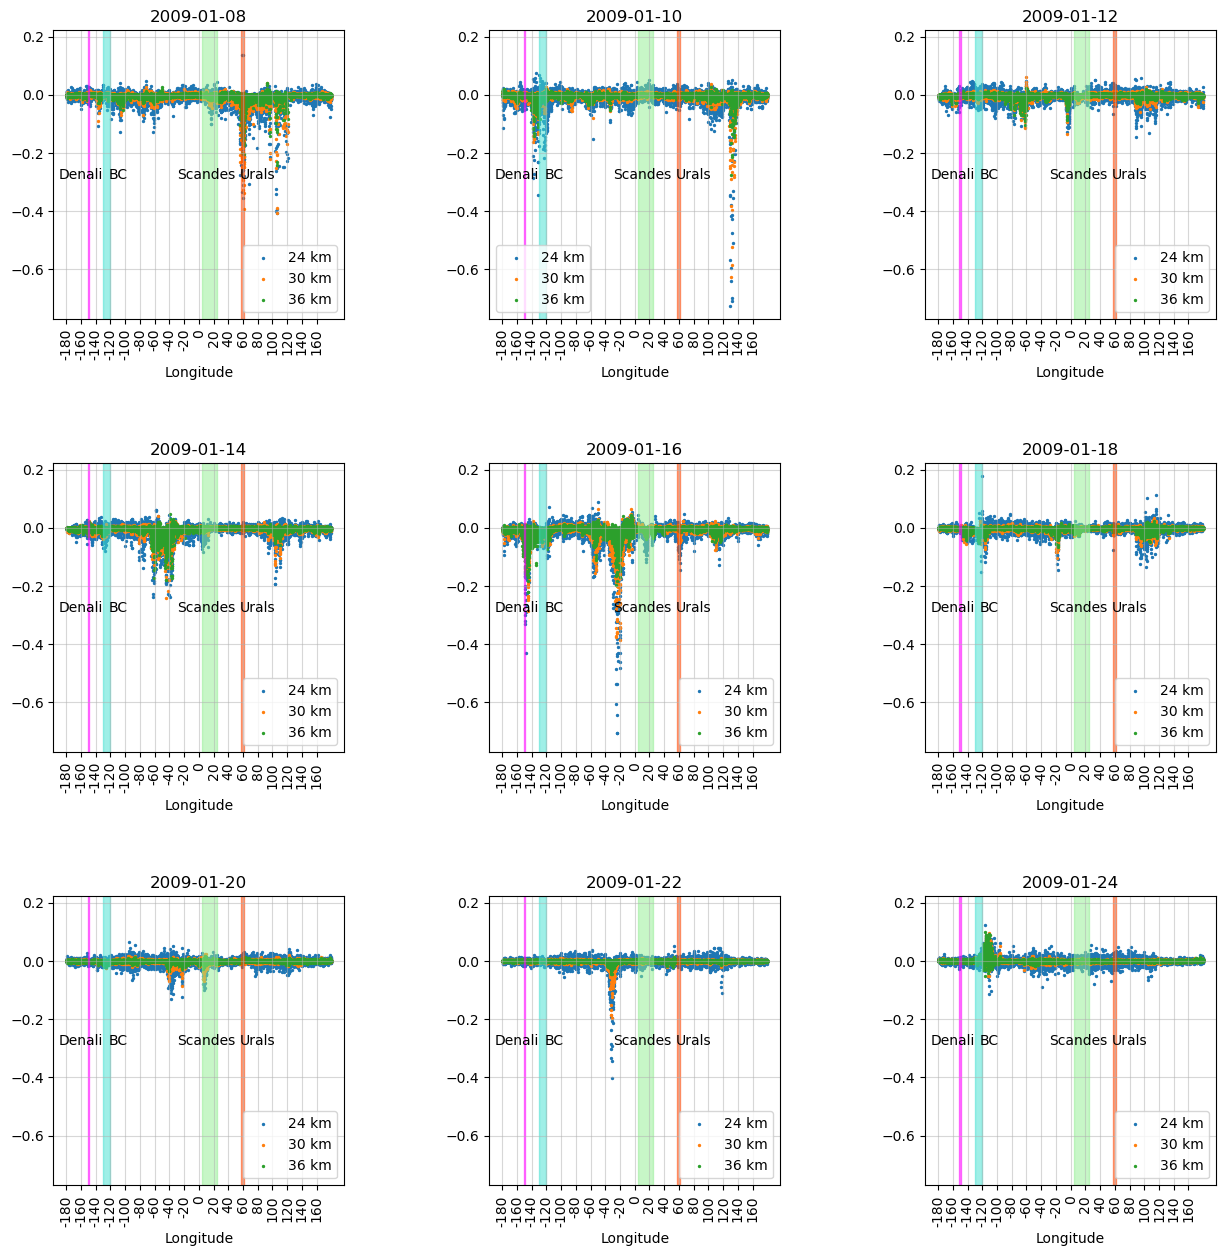

In [71]:


def read_data_files(data_path, lat_file, lon_file):
    lat = np.genfromtxt(lat_file, delimiter=',')
    lon = np.genfromtxt(lon_file, delimiter=',')
    data = np.load(data_path)['arr_0']
    return data, lat, lon

def filter_data(grid, data):
    cos_lat = np.cos(np.deg2rad(grid.nh_lat))
    select_area_indexer = grid.select_area_indexer(min_lat=55, max_lat=65, min_lon=-180, max_lon=180)
    data_filtered = wizard.data_filtering(select_area_indexer=select_area_indexer, data=data)
    return data_filtered

def merge_and_sort_data(data_filtered, lon):
    data_lon = np.dstack((data_filtered.flatten(), lon.flatten()))[0]
    data_lon_sorted = data_lon[data_lon[:, 1].argsort()]
    return data_lon_sorted

def plot_data(data_lon_sorted, altitude):
    plt.scatter(data_lon_sorted[:, 1], data_lon_sorted[:, 0], label=f'{altitude} km', s=5)
    


def plot_data_for_dates(altitudes, dates, grid, lat_file, lon_file):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, date in enumerate(dates):
        ax = axes.flatten()[i]
        for altitude in altitudes:
            data_path = f'processed_airs_sftp/40_km_grid/{altitude}km/mfx/{date}_mfx.npz'
            data, lat, lon = read_data_files(data_path, lat_file, lon_file)
            data_filtered = filter_data(grid, data)
            data_lon_sorted = merge_and_sort_data(data_filtered, lon)
            ax.scatter(data_lon_sorted[:, 1], data_lon_sorted[:, 0], label=f'{altitude} km', s=2)

        ax.set_title(date)
        ax.legend()
        ax.tick_params(which='both', bottom=True, left=True, labelbottom=True, labelleft=True)

        # add vertical line at 0 degrees longitude and label it
        # Urals
        ax.axvspan(58, 62, color='orangered', alpha=0.5)
        ax.text(80, 0.5, 'Urals', transform=ax.get_xaxis_transform(), ha='center', va='center')
        
        # Scandes
        ax.axvspan(5, 25, color='lightgreen', alpha=0.5)
        ax.text(10, 0.5, 'Scandes', transform=ax.get_xaxis_transform(), ha='center', va='center')

        # Denali
        ax.axvspan(-151, -149, color='magenta', alpha=0.5)
        ax.text(-160, 0.5, 'Denali', transform=ax.get_xaxis_transform(), ha='center', va='center')

        # BC Ranges
        ax.axvspan(-130, -120, color='turquoise', alpha=0.5)
        ax.text(-110, 0.5, 'BC', transform=ax.get_xaxis_transform(), ha='center', va='center')

        # set x labels every 10 degrees and rotate them 90 degrees
        ax.set_xticks(np.arange(-180, 180, 20))
        ax.set_xticklabels(np.arange(-180, 180, 20), rotation=90)
        # add a grid for all x tick labels
        ax.xaxis.grid(True, which='major', linestyle='-', alpha=0.5)
        ax.yaxis.grid(True, which='major', linestyle='-', alpha=0.5)
        ax.set_xlabel('Longitude')

grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()
lat_file = '/Users/joaojesus/Desktop/final_year_proj/coordinates_40km_grid/Airs_nh_lat_40_grid.csv'
lon_file = '/Users/joaojesus/Desktop/final_year_proj/coordinates_40km_grid/Airs_nh_lon_40_grid.csv'

altitudes = [24, 30, 36]
dates = get_day_array(date_string = "2009-01-24", days = 9)

dates = ['2009-01-08',
 '2009-01-10',
 '2009-01-12',
 '2009-01-14',
 '2009-01-16',
 '2009-01-18',
 '2009-01-20',
 '2009-01-22',
 '2009-01-24']

# dates = [
# '2018-01-29',
# '2018-01-31',
#  '2018-02-02',
#  '2018-02-04',
#  '2018-02-06',
#  '2018-02-08',
#  '2018-02-10',
#  '2018-02-12',
#  '2018-02-14']

plot_data_for_dates(altitudes, dates, grid, lat_file, lon_file)
plt.show()


In [63]:
dates = get_day_array(date_string = "2018-02-14", days = 8)


In [64]:
dates

['2018-02-06',
 '2018-02-07',
 '2018-02-08',
 '2018-02-09',
 '2018-02-10',
 '2018-02-11',
 '2018-02-12',
 '2018-02-13']